In [1]:
pip install textblob

In [1]:
from textblob import TextBlob

In [3]:
text = "This is a text"

In [4]:
output = TextBlob(text)
output.tags

[('This', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('text', 'NN')]

# Named Entity Recognition

In [1]:
from nltk import ne_chunk, pos_tag, word_tokenize

In [2]:
input_str = "Bill works fro Microsoft, so he went to Boston for a conference."
input_str

'Bill works fro Microsoft, so he went to Boston for a conference.'

In [3]:
tokens = word_tokenize(input_str)
tokens

['Bill',
 'works',
 'fro',
 'Microsoft',
 ',',
 'so',
 'he',
 'went',
 'to',
 'Boston',
 'for',
 'a',
 'conference',
 '.']

In [4]:
token_pos = pos_tag(tokens)
token_pos

[('Bill', 'NNP'),
 ('works', 'VBZ'),
 ('fro', 'JJ'),
 ('Microsoft', 'NNP'),
 (',', ','),
 ('so', 'IN'),
 ('he', 'PRP'),
 ('went', 'VBD'),
 ('to', 'TO'),
 ('Boston', 'NNP'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('conference', 'NN'),
 ('.', '.')]

In [5]:
print(ne_chunk(token_pos))

(S
  (PERSON Bill/NNP)
  works/VBZ
  fro/JJ
  (ORGANIZATION Microsoft/NNP)
  ,/,
  so/IN
  he/PRP
  went/VBD
  to/TO
  (GPE Boston/NNP)
  for/IN
  a/DT
  conference/NN
  ./.)


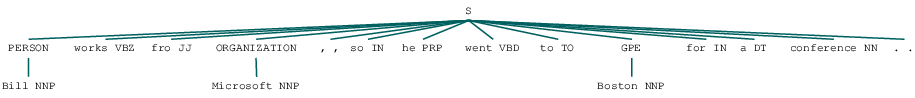

In [7]:
ne_chunk(token_pos)

# Collocation

In [9]:
from nltk.collocations import BigramAssocMeasures, TrigramAssocMeasures, BigramCollocationFinder, TrigramCollocationFinder

In [15]:
bigram_measure = BigramAssocMeasures()
trigram_measure = TrigramAssocMeasures()

In [16]:
text = "I put the key on the line. United States is on the south. United States has more population than we have"
text

'I put the key on the line. United States is on the south. United States has more population than we have'

In [17]:
finder = BigramCollocationFinder.from_words(word_tokenize(text))

In [18]:
finder.nbest(bigram_measure.pmi, 2)

[('I', 'put'), ('has', 'more')]

In [20]:
import nltk
myText = nltk.corpus.genesis.words('english-web.txt')

In [23]:
finder = BigramCollocationFinder.from_words(myText)
finder.nbest(bigram_measure.pmi, 10)

[('Allon', 'Bacuth'),
 ('Ashteroth', 'Karnaim'),
 ('Ben', 'Ammi'),
 ('En', 'Mishpat'),
 ('Jegar', 'Sahadutha'),
 ('Salt', 'Sea'),
 ('Whoever', 'sheds'),
 ('appoint', 'overseers'),
 ('aromatic', 'resin'),
 ('cutting', 'instrument')]

In [24]:
finder = TrigramCollocationFinder.from_words(myText)
finder.nbest(trigram_measure.pmi, 10)

[('olive', 'leaf', 'plucked'),
 ('rider', 'falls', 'backward'),
 ('sewed', 'fig', 'leaves'),
 ('yield', 'royal', 'dainties'),
 ('during', 'mating', 'season'),
 ('Salt', 'Sea', ').'),
 ('Sea', ').', 'Twelve'),
 ('Their', 'hearts', 'failed'),
 ('Valley', ').', 'Melchizedek'),
 ('doing', 'forced', 'labor')]

# Synonyms and antonyms

In [26]:
from nltk.corpus import wordnet

In [27]:
wordnet.synsets('cat')

[Synset('cat.n.01'),
 Synset('guy.n.01'),
 Synset('cat.n.03'),
 Synset('kat.n.01'),
 Synset('cat-o'-nine-tails.n.01'),
 Synset('caterpillar.n.02'),
 Synset('big_cat.n.01'),
 Synset('computerized_tomography.n.01'),
 Synset('cat.v.01'),
 Synset('vomit.v.01')]

In [28]:
result = wordnet.synsets('active')
result

[Synset('active_agent.n.01'),
 Synset('active_voice.n.01'),
 Synset('active.n.03'),
 Synset('active.a.01'),
 Synset('active.s.02'),
 Synset('active.a.03'),
 Synset('active.s.04'),
 Synset('active.a.05'),
 Synset('active.a.06'),
 Synset('active.a.07'),
 Synset('active.s.08'),
 Synset('active.a.09'),
 Synset('active.a.10'),
 Synset('active.a.11'),
 Synset('active.a.12'),
 Synset('active.a.13'),
 Synset('active.a.14')]

In [29]:
result[1].lemmas()[0].name()

'active_voice'

In [31]:
synonyms = []
antonyms = []
for syn in wordnet.synsets('active'):
    for l in syn.lemmas():
        synonyms.append(l.name())
        if l.antonyms():
            antonyms.append(l.antonyms()[0].name())
print('Synonyms: ', synonyms)
print('Antonyms: ', antonyms)

Synonyms:  ['active_agent', 'active', 'active_voice', 'active', 'active', 'active', 'active', 'combat-ready', 'fighting', 'active', 'active', 'participating', 'active', 'active', 'active', 'active', 'alive', 'active', 'active', 'active', 'dynamic', 'active', 'active', 'active']
Antonyms:  ['passive_voice', 'inactive', 'passive', 'inactive', 'inactive', 'inactive', 'quiet', 'passive', 'stative', 'extinct', 'dormant', 'inactive']


# Word lengthening

In [33]:
import re

In [34]:
text = 'commmmmmmitttttttteeeeeeee'

In [35]:
pattern = re.compile(r'(.)\1{2,}')
pattern

re.compile(r'(.)\1{2,}', re.UNICODE)

In [36]:
my_pat = re.search(pattern, text)[0]
my_pat

'mmmmmmm'

# Spell checker

In [1]:
pip install pattern

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pattern.en import suggest

In [4]:
print(suggest('Whitle'))

[('While', 0.6459209419680404), ('White', 0.2968881412952061), ('Title', 0.03280067283431455), ('Whistle', 0.023549201009251473), ('Chile', 0.0008410428931875525)]
